#Import Librairies


In [1]:
import numpy as np
import pandas as pd

from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage, fcluster 
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from pandas.plotting import parallel_coordinates
import seaborn as sns
import matplotlib.pyplot as plot

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import decomposition, preprocessing,cluster, cluster, metrics

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from datetime import datetime

import time
import folium
import json

In [2]:
df_final = pd.read_csv("df_final.csv")

In [3]:
df_final.head()

,Zone,Population,% Popu 2007_2017,Dispo intérieure poulet,Exportations poulet,Importations poulet,Production poulet,Consommation poulet,Taux_import_poulet %,Taux_expot_poulet %,Taux_consom_poulet %,Stabilité politique,PIB par habitant(USD)
0,Afghanistan,36296113,33.931347,5.700000e+07,-1530000.0,29000000.0,2.800000e+07,5.500000e+07,0.64,-0.25,0.42,-2.80,2058.4
1,Afrique du Sud,57009756,16.062776,2.118000e+09,63000000.0,514000000.0,1.667000e+09,2.035000e+09,5.70,0.57,6.41,-0.28,13860.3
2,Albanie,2884169,-4.938335,4.700000e+07,0.0,38000000.0,1.300000e+07,4.700000e+07,4.30,0.00,1.29,0.38,12771.0
3,Algérie,41389189,21.138007,2.770000e+08,0.0,2000000.0,2.750000e+08,2.640000e+08,0.01,0.00,0.80,-0.92,11737.4
4,Allemagne,82658409,1.698592,1.739000e+09,646000000.0,842000000.0,1.514000e+09,1.609000e+09,1.27,1.10,2.06,0.59,53071.5


In [4]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Zone                     170 non-null    object 
 1   Population               170 non-null    int64  
 2   % Popu 2007_2017         170 non-null    float64
 3   Dispo intérieure poulet  170 non-null    float64
 4   Exportations poulet      170 non-null    float64
 5   Importations poulet      170 non-null    float64
 6   Production poulet        170 non-null    float64
 7   Consommation poulet      170 non-null    float64
 8   Taux_import_poulet %     170 non-null    float64
 9   Taux_expot_poulet %      170 non-null    float64
 10  Taux_consom_poulet %     170 non-null    float64
 11  Stabilité politique      170 non-null    float64
 12  PIB par habitant(USD)    170 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 17.4+ KB


#**ACP : Analyse des composants principaux**

#**Préparation des données pour l'ACP**

In [5]:
# Indexation par la colonne Zone
X = df_final.set_index('Zone')
X.head()

,Population,% Popu 2007_2017,Dispo intérieure poulet,Exportations poulet,Importations poulet,Production poulet,Consommation poulet,Taux_import_poulet %,Taux_expot_poulet %,Taux_consom_poulet %,Stabilité politique,PIB par habitant(USD)
Zone,,,,,,,,,,,,
Afghanistan,36296113,33.931347,5.700000e+07,-1530000.0,29000000.0,2.800000e+07,5.500000e+07,0.64,-0.25,0.42,-2.80,2058.4
Afrique du Sud,57009756,16.062776,2.118000e+09,63000000.0,514000000.0,1.667000e+09,2.035000e+09,5.70,0.57,6.41,-0.28,13860.3
Albanie,2884169,-4.938335,4.700000e+07,0.0,38000000.0,1.300000e+07,4.700000e+07,4.30,0.00,1.29,0.38,12771.0
Algérie,41389189,21.138007,2.770000e+08,0.0,2000000.0,2.750000e+08,2.640000e+08,0.01,0.00,0.80,-0.92,11737.4
Allemagne,82658409,1.698592,1.739000e+09,646000000.0,842000000.0,1.514000e+09,1.609000e+09,1.27,1.10,2.06,0.59,53071.5


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_pca = pd.DataFrame(X_scaled, columns=['F1', 'F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12'])
print(df_pca.head())

         F1        F2        F3        F4        F5        F6        F7  \
0 -0.044439  1.247909 -0.289165 -0.228052 -0.325217 -0.277627 -0.282618   
1  0.090516  0.036630  0.655926 -0.087698  2.280627  0.383122  0.646850   
2 -0.262126 -1.386999 -0.293750 -0.224724 -0.276861 -0.283674 -0.286373   
3 -0.011256  0.380671 -0.188282 -0.224724 -0.470284 -0.178051 -0.184507   
4  0.257623 -0.937093  0.482132  1.180339  4.042929  0.321441  0.446873   

         F8        F9       F10       F11       F12  
0 -0.499988  0.145194 -1.028629 -3.056457 -0.879923  
1  0.874451  0.155260  1.375219 -0.240512 -0.307524  
2  0.494172  0.148263 -0.679489  0.496997 -0.360356  
3 -0.671114  0.148263 -0.876131 -0.955673 -0.410486  
4 -0.328862  0.161766 -0.370480  0.731659  1.594241  


#**Calcul des composantes principales**

In [7]:
# Nombre de composantes souhaitées
n_comp = 12

# Calcul des composantes principales
pca = PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=12)

In [8]:
# Proportion de variance expliquée
pca.explained_variance_ratio_

array([3.46318842e-01, 1.88933242e-01, 1.18953998e-01, 8.28221322e-02,
       6.94477022e-02, 5.89331349e-02, 5.55145370e-02, 3.88194929e-02,
       2.45348945e-02, 1.55801040e-02, 1.10769607e-04, 3.11503214e-05])

In [9]:
# Cumul de variance expliquée
pca.explained_variance_ratio_.cumsum()

array([0.34631884, 0.53525208, 0.65420608, 0.73702821, 0.80647592,
       0.86540905, 0.92092359, 0.95974308, 0.98427798, 0.99985808,
       0.99996885, 1.        ])

In [10]:
# Définition de la fonction pour le graphique Éboulis des valeurs propres
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(), c="Green", marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie(%)")
    plt.title("Éboulis des valeurs propres")
    plt.show(block=False)

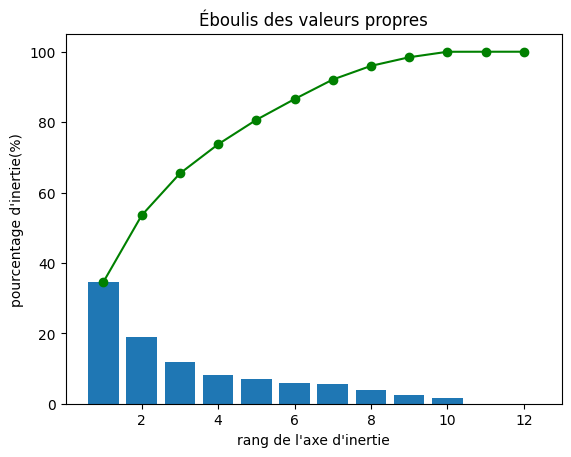

In [11]:
display_scree_plot(pca)
plt.show()

#**Cercle des corrélations**

In [12]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks:  
        # Détermination des limites du graphique
        xmin, xmax, ymin, ymax = lims if lims else (-1, 1, -1, 1) if pcs.shape[1] < 30 else (min(pcs[d1, :]), max(pcs[d1, :]), min(pcs[d2, :]), max(pcs[d2, :]))

        # Initialisation de la figure
        fig, ax = plt.subplots(figsize=(10, 10))

        # Affichage des flèches
        if pcs.shape[1] < 30:
            plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]), pcs[d1, :], pcs[d2, :], angles='xy', scale_units='xy', scale=1, color="grey")
        else:
            lines = [[[0, 0], [x, y]] for x, y in pcs[[d1, d2]].T]
            ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='yellow'))

        # Affichage des noms des variables
        if labels is not None:
            for i, (x, y) in enumerate(pcs[[d1, d2]].T):
                if x >= xmin and x <= xmax and y >= ymin and y <= ymax:
                    plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="green", alpha=0.5)

        # Affichage du cercle
        circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b')
        plt.gca().add_artist(circle)

        # Définition des limites du graphique
        plt.xlim(xmin, xmax)
        plt.ylim(ymin, ymax)

        # Affichage des lignes horizontales et verticales
        plt.plot([-1, 1], [0, 0], color='pink', ls='--')
        plt.plot([0, 0], [-1, 1], color='pink', ls='--')

        # Nom des axes, avec le pourcentage d'inertie expliqué
        plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
        plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))

        plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
        plt.show(block=False)



 Le code ci-dessus définit une fonction display_circles qui permet d'afficher un graphique en cercle de corrélation pour des données qui ont été préalablement analysées avec une analyse en composantes principales (PCA).

- La fonction prend en entrée plusieurs paramètres:

- **pcs**: la matrice des composantes principales obtenue à partir de l'analyse en composantes principales
- **n_comp**: le nombre de composantes principales à prendre en compte
- **pca**: l'objet de la classe PCA créé lors de l'analyse en composantes principales
- **axis_ranks**: une liste de tuples représentant les axes à afficher sur le graphique en cercle de corrélation
- **labels**: une liste de noms pour chaque variable qui sera affiché sur le graphique
- **label_rotation**: la rotation des étiquettes de chaque variable
lims: les limites des axes x et y

La fonction itère sur chaque tuple de axis_ranks et récupère les limites x et y en fonction des paramètres lims. Si lims est vide, les limites par défaut sont fixées à (-1, 1) pour les deux axes si le nombre de variables est inférieur à 30, sinon les limites sont définies en fonction des valeurs min et max des composantes principales pour chaque axe.

Ensuite, la fonction affiche les flèches pour chaque variable sur le graphique en cercle de corrélation. Si le nombre de variables est inférieur à 30, les flèches sont affichées directement, sinon des lignes sont tracées pour représenter la direction des flèches.

La fonction affiche également les noms des variables si labels n'est pas vide, en tenant compte de la rotation des étiquettes. Les noms des variables sont affichés uniquement si les composantes principales de la variable sont comprises dans les limites x et y.

Le cercle de corrélation et définit les limites du graphique. Les lignes horizontales et verticales sont tracées et les axes x et y sont nommés avec le pourcentage d'inertie expliqué. Enfin, la fonction affiche le graphique en cercle de corrélation.






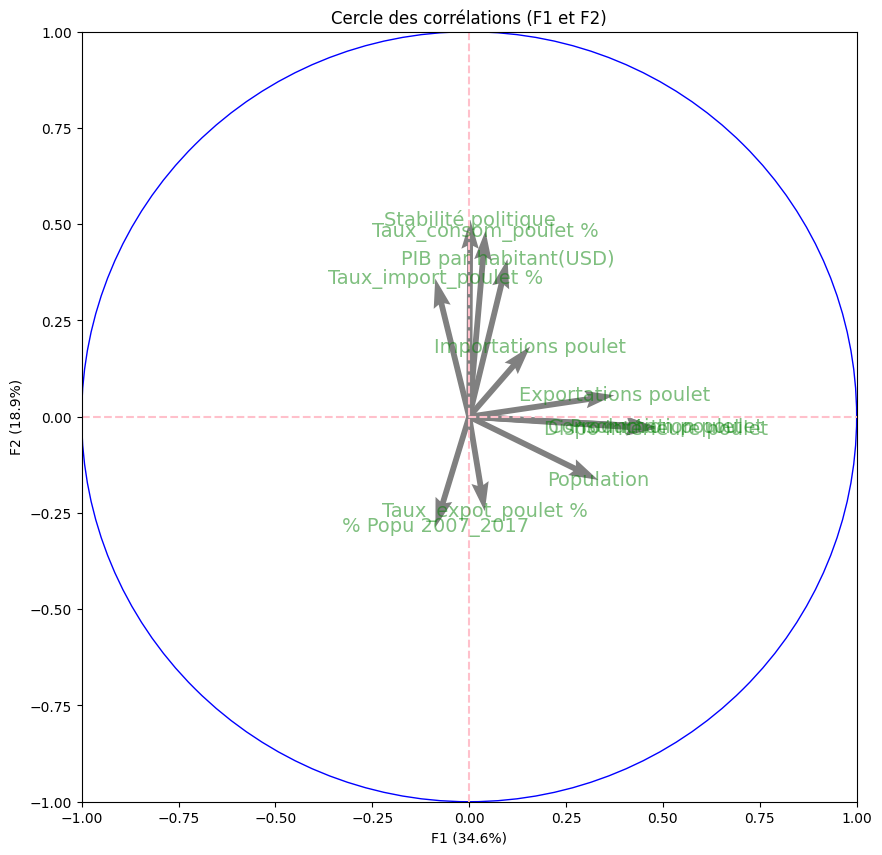

In [13]:
# Générer le Cercle des corrélations F1 et F2.
pcs = pca.components_ 
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(X.columns))

In [14]:
X.columns

Index(['Population', '% Popu 2007_2017', 'Dispo intérieure poulet',
       'Exportations poulet', 'Importations poulet', 'Production poulet',
       'Consommation poulet', 'Taux_import_poulet %', 'Taux_expot_poulet %',
       'Taux_consom_poulet %', 'Stabilité politique', 'PIB par habitant(USD)'],
      dtype='object')

In [15]:
F1 = pca.components_[0]
F1

array([ 0.33289535, -0.08711848,  0.48137406,  0.37474896,  0.15773419,
        0.48186805,  0.48111506, -0.08748751,  0.04031092,  0.0420491 ,
        0.00284605,  0.09914353])

In [16]:
F2 = pca.components_[1]
F2

array([-0.16426577, -0.28709333, -0.03137869,  0.05567094,  0.18254035,
       -0.02671792, -0.02717325,  0.35891503, -0.24551625,  0.48264383,
        0.51172791,  0.40966856])

- **Avec le cercle des corrélations F1-F2 (la projection de la flèche sur F1 correspond au coefficient de corrélation ), on peut trouver des variables qui sont bien corrélées aux composantes principales:**

Par exemple: avec le cercle représenté ci-dessus, les variables les plus corrélées positivement à F1 sont:

-Dispo intérieure poulet
- Production poulet
- Consommation poulet
- Exportations poule
- Population

Les variables corrélées légèrement négativement à F1 sont :

- % Popu 2012_2017
- Taux_import_poulet %

Les variables les plus corrélées positivement à F2 sont :

- Stabilité politique
- Taux_consom_poulet %
- PIB par habitant(USD)
- Taux_import_poulet %

Les variables les plus corrélées négativement à F2 sont :

- Population
- Taux_expot_poulet %
- '% Popu 2007_2017'

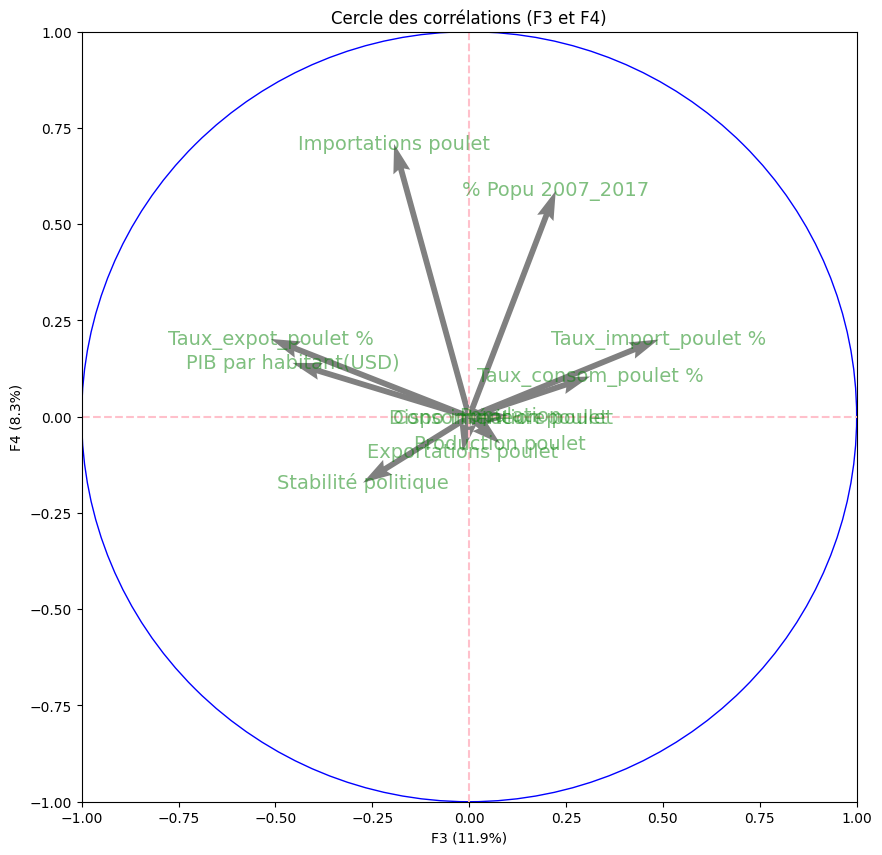

In [17]:
# Générer le Cercle des corrélations F3 et F4
pcs = pca.components_ 
display_circles(pcs, n_comp, pca, [(2,3)], labels = np.array(X.columns))

In [18]:
X.columns

Index(['Population', '% Popu 2007_2017', 'Dispo intérieure poulet',
       'Exportations poulet', 'Importations poulet', 'Production poulet',
       'Consommation poulet', 'Taux_import_poulet %', 'Taux_expot_poulet %',
       'Taux_consom_poulet %', 'Stabilité politique', 'PIB par habitant(USD)'],
      dtype='object')

In [19]:
F3 = pca.components_[2]
F3

array([ 0.10633048,  0.2234574 ,  0.08176524, -0.01673108, -0.19370828,
        0.08016385,  0.08136731,  0.48871863, -0.51167304,  0.31238901,
       -0.27387434, -0.45604397])

In [20]:
F4 = pca.components_[3]
F4

array([ 0.00122616,  0.58685975, -0.00215804, -0.09032026,  0.70837086,
       -0.06973716, -0.00187183,  0.20045151,  0.20202031,  0.10446296,
       -0.17122703,  0.13982652])

- **Avec le cercle des corrélations F3-F4, on peut trouver des variables qui sont bien corrélées aux composantes principales:**

Les variables les plus corrélées positivement à F3 sont : 

- Taux_import_poulet %
- Taux_consom_poulet %
- % Popu 2007_2017

Les variables les plus corrélées négativement à F3 sont :

- Taux_expot_poulet %
- PIB par habitant(USD)
- Stabilité politique
- Importations poulet

Les variables les plus corrélées positivement à F4 sont :

- Importations poulet
- % Popu 2007_2017
- Taux_expot_poulet %
- Taux_import_poulet %

Les variables les plus corrélées négativement à F4 sont :

- Stabilité politique

#**Projection des individus**

In [21]:
import matplotlib.pyplot as plt

def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1, d2 in axis_ranks:
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha, c=illustrative_var)
        if labels is not None:
            for i, (x, y) in enumerate(X_projected[:, [d1, d2]]):
                ax.text(x, y, labels[i], fontsize='14', ha='center', va='center')
        boundary = np.max(np.abs(X_projected[:, [d1, d2]])) * 1.1
        ax.set_xlim([-boundary, boundary])
        ax.set_ylim([-boundary, boundary])
        ax.axhline(0, color='grey', ls='--')
        ax.axvline(0, color='grey', ls='--')
        ax.set_xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
        ax.set_ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))
        ax.set_title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
    plt.show()

La fonction prend en entrée les paramètres suivants:

- X_projected: une matrice représentant les individus projetés sur les plans factoriels
- n_comp: le nombre de composantes principales utilisées pour la projection
- pca: un objet représentant l'ACP, contenant les informations sur les valeurs propres et vecteurs propres
- axis_ranks: une liste de paires de nombres représentant les plans factoriels à afficher
- labels: une liste d'étiquettes pour les individus
- alpha: un paramètre pour définir la transparence des points affichés
- illustrative_var: une variable illustrative pour colorer les points en fonction d'une variable supplémentaire


Utilise une boucle pour parcourir chaque paire de plans factoriels dans la 
liste axis_ranks. Pour chaque paire de plans, elle crée une figure avec une taille de 10x10 pouces. Les points projetés sont ensuite affichés en utilisant la méthode scatter de la bibliothèque matplotlib. Si une variable illustrative est fournie, les points sont colorés en fonction de cette variable en utilisant la paramètre c de la méthode scatter.

Si des étiquettes sont fournies, elles sont ajoutées à la figure en utilisant la méthode text. Les limites des axes sont déterminées en fonction de la valeur absolue maximale des projections et sont définies en utilisant les méthodes set_xlim et set_ylim. Les lignes horizontales et verticales sont ajoutées en utilisant les méthodes axhline et axvline.

Les étiquettes des axes sont définies en fonction des pourcentages de variance expliquée par les plans factoriels, qui sont stockées dans l'objet pca en utilisant la méthode explained_variance_ratio_. Enfin, un titre est ajouté à la figure pour indiquer quelles composantes principales ont été utilisées pour la projection.

La fonction est utile pour visualiser la structure des données dans un espace de faible dimension. En utilisant des couleurs pour la variable illustrative, on peut également mettre en évidence des différences dans les groupes d'individus. La fonction est assez flexible pour permettre de visualiser différentes paires de plans factoriels et d'afficher des étiquettes pour chaque individu.





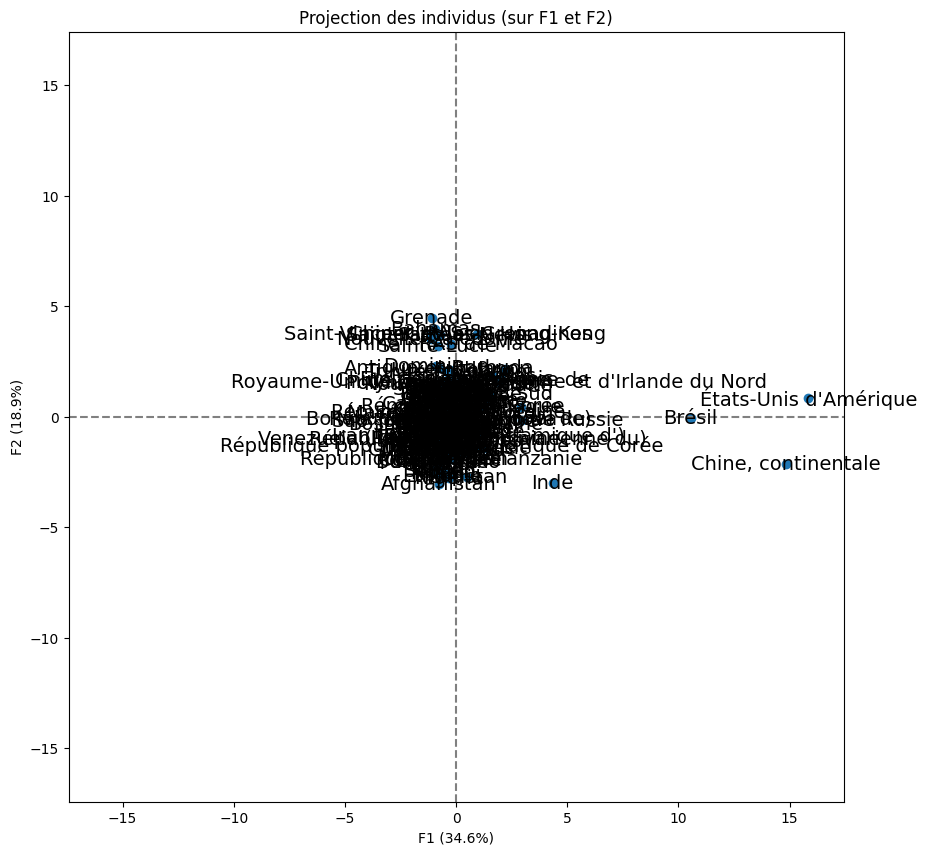

In [22]:
# Projection des individus sur F1 et F2 
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0, 1)],labels = np.array(X.index))

plt.show()

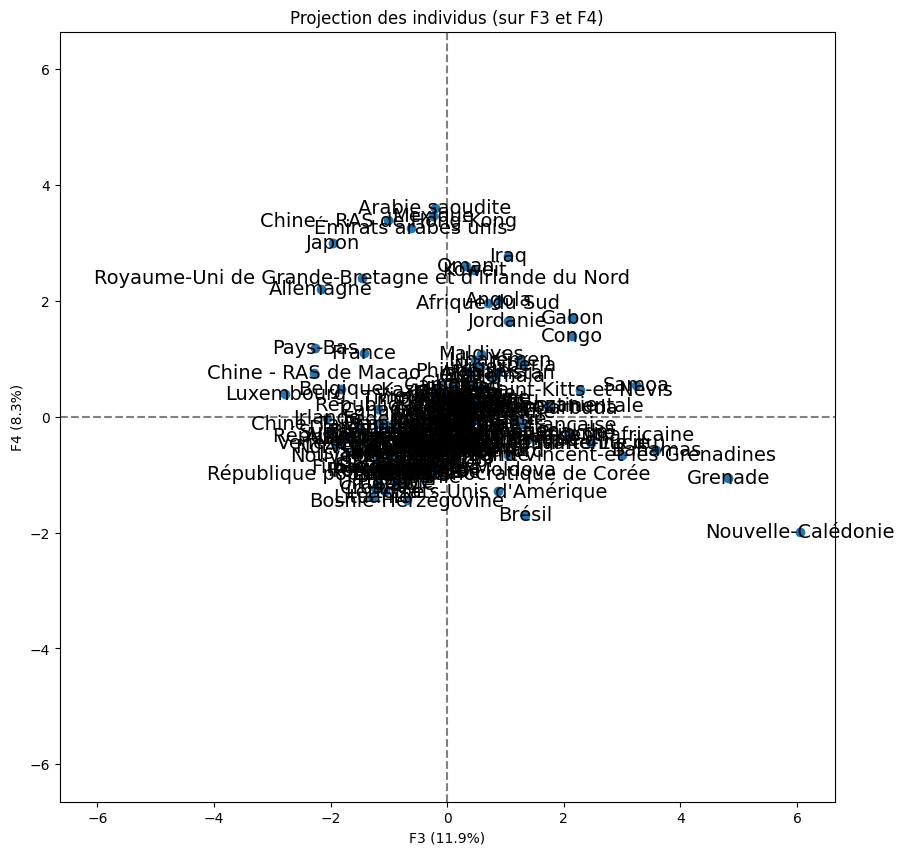

In [23]:
# Projection des individus sur F3 et F4 
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(2, 3)],labels = np.array(X.index))

plt.show()

In [24]:
# Créer le dataframe avec les valeurs des composantes principales
df_ACP = pd.DataFrame(X_projected, index=X.index, columns=["F"+str(i+1) for i in range (12)]).reset_index()
df_ACP = df_ACP[['Zone','F1','F2','F3','F4']]
df_ACP.head()

,Zone,F1,F2,F3,F4
0,Afghanistan,-0.758812,-3.034970,0.870438,0.764997
1,Afrique du Sud,1.121786,1.028060,0.698114,1.964206
2,Albanie,-0.610330,0.322500,-0.368870,-1.046624
3,Algérie,-0.476073,-1.547457,-0.094564,-0.166140
4,Allemagne,2.029269,1.685524,-2.170007,2.209060


#**Classification ascendante hiérarchique**

In [25]:
def plot_dendrogram(Z, names, figsize=(15,30)):
    plt.figure(figsize=figsize)
    plt.title('Hierarchical Clustering Dendrogram', fontsize=20)
    plt.xlabel('distance')
    dendrogram(Z, labels=names, orientation='left', leaf_font_size=12)

#**Dendrogramme**

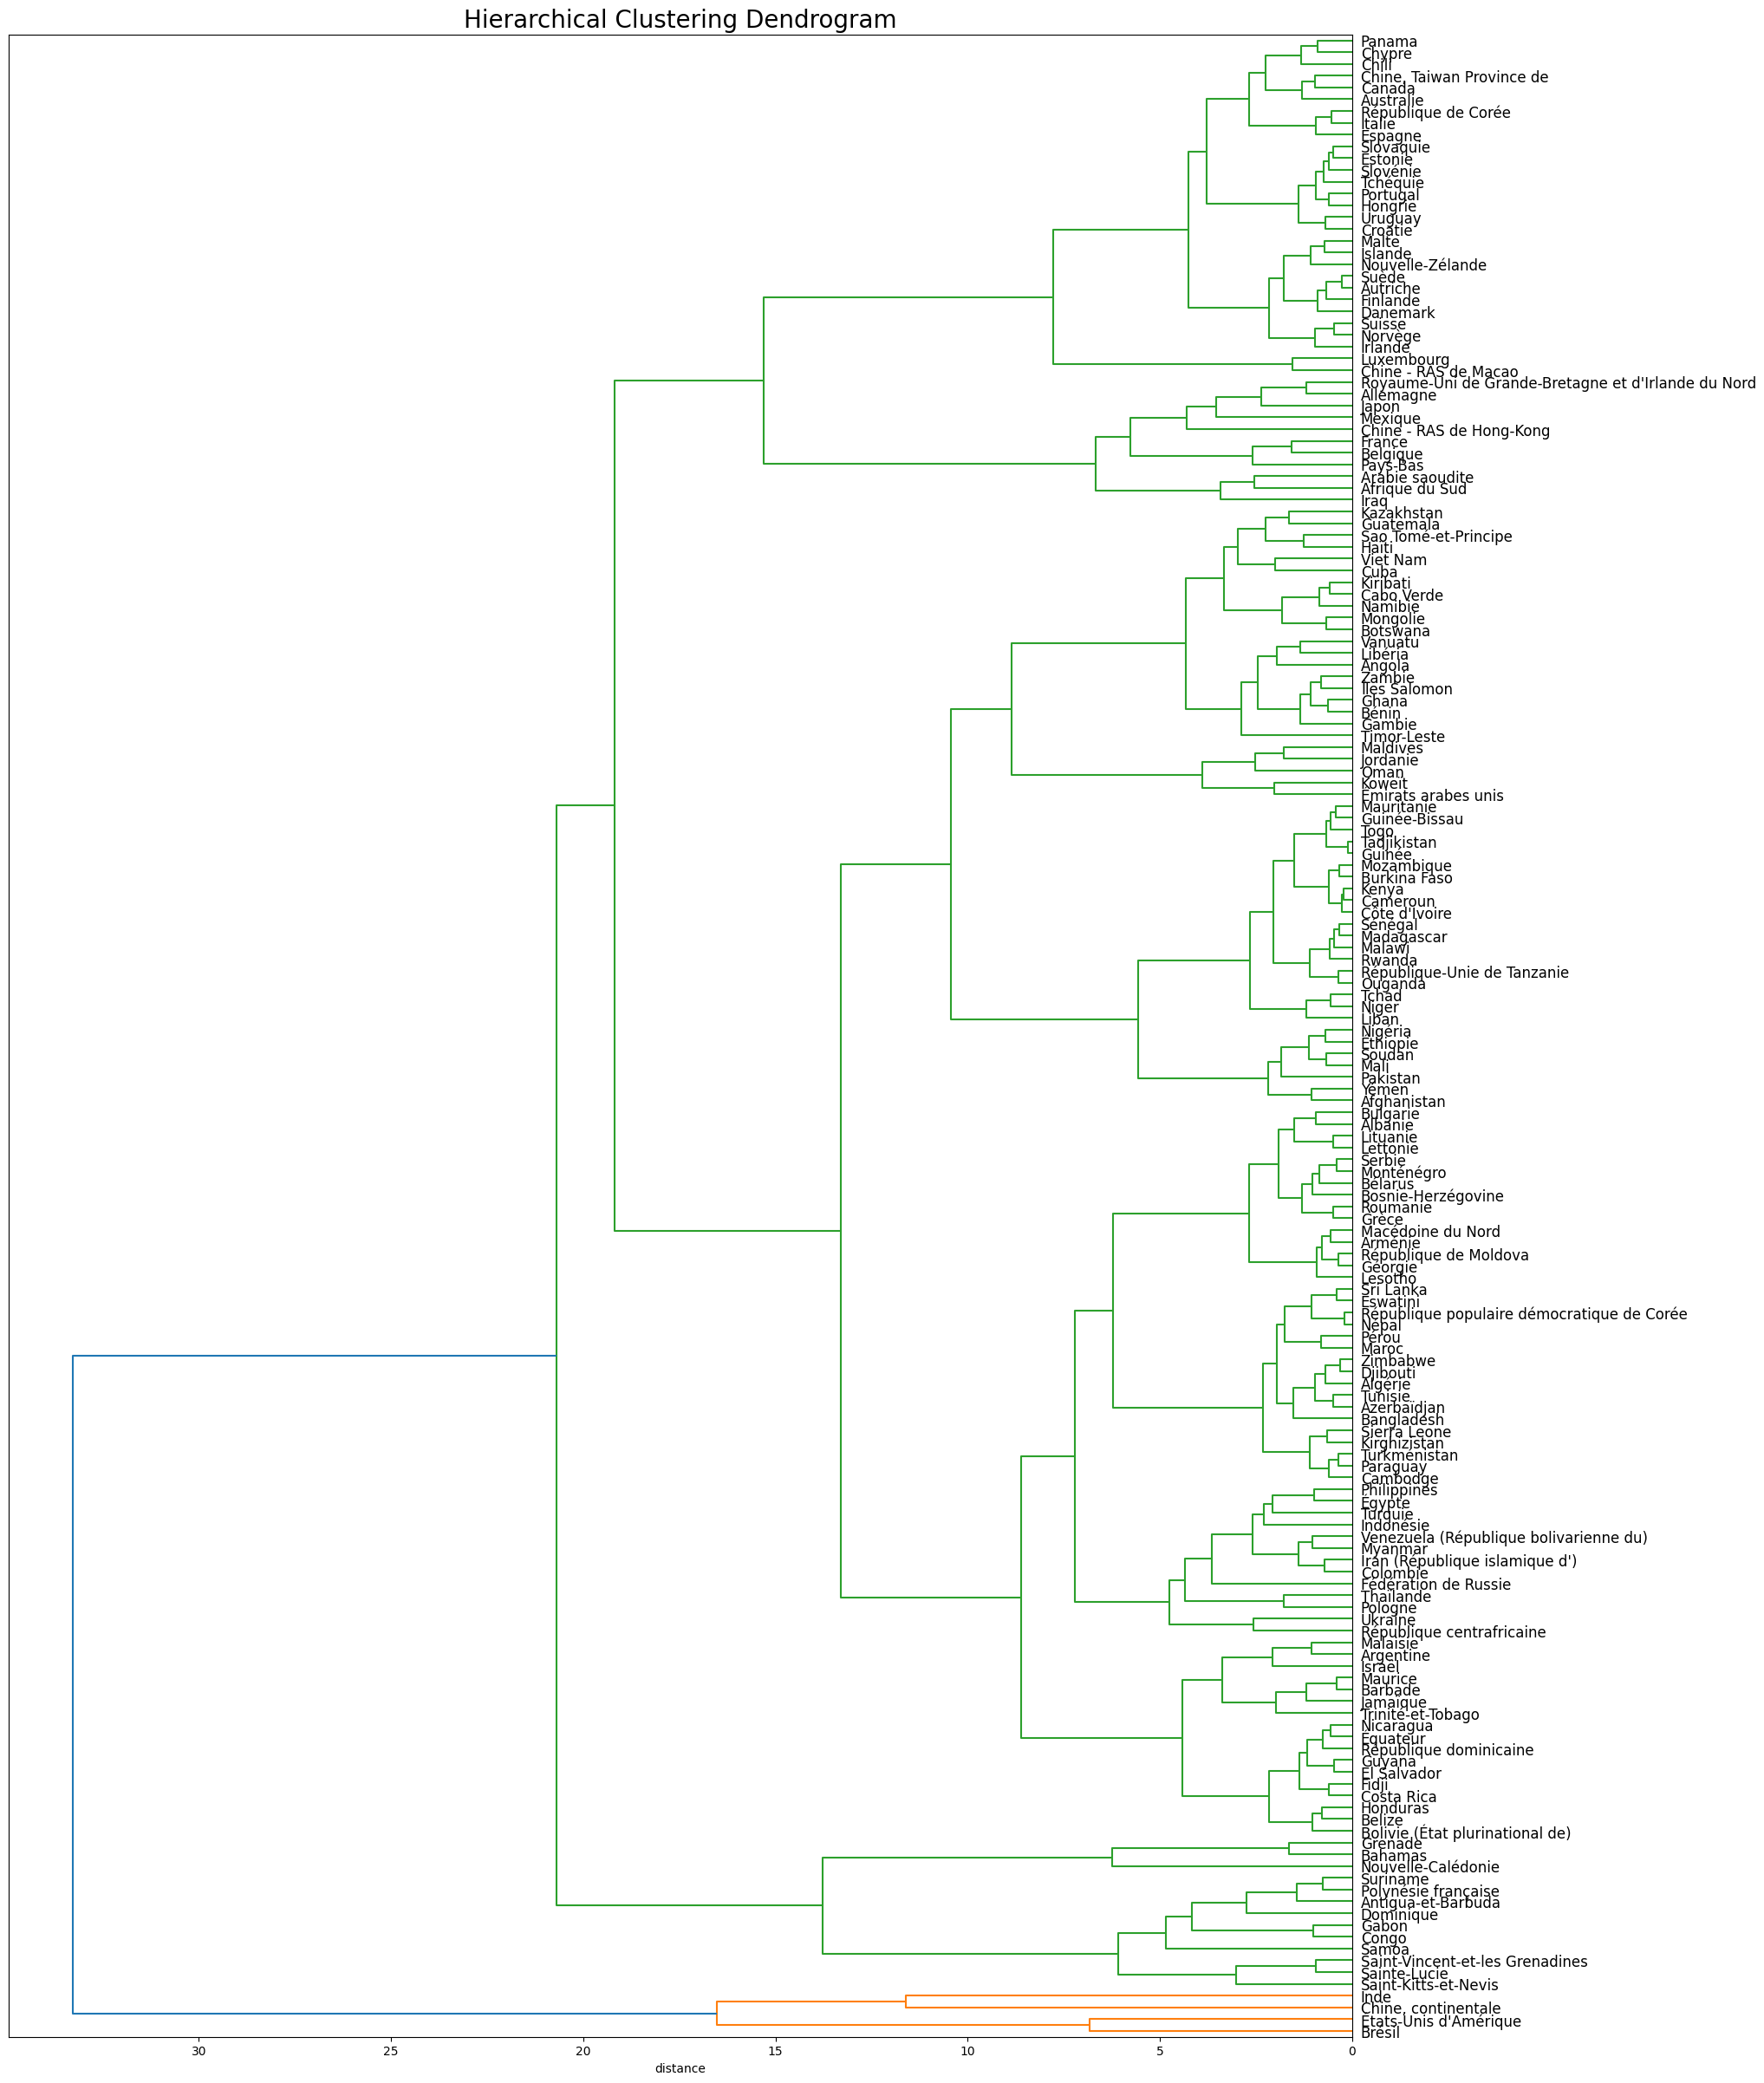

In [26]:
# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')
names = X.index

# Affichage du dendrogramme
plot_dendrogram(Z, names,figsize=(20,30))

In [27]:
# Créer un modèle de clustering hiérarchique
hiercluster = AgglomerativeClustering(affinity='euclidean', linkage='ward', compute_full_tree=True) 

In [28]:
# Découpe du dendrogramme en 4 clusters
hiercluster.set_params(n_clusters=4)
clusters = hiercluster.fit_predict(X_scaled) 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [29]:
# Ajouter le numéro de cluster aux données originales
X_scaled_clustered = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_clustered['Cluster'] = clusters

X_scaled_clustered.head()

,Population,% Popu 2007_2017,Dispo intérieure poulet,Exportations poulet,Importations poulet,Production poulet,Consommation poulet,Taux_import_poulet %,Taux_expot_poulet %,Taux_consom_poulet %,Stabilité politique,PIB par habitant(USD),Cluster
Zone,,,,,,,,,,,,,
Afghanistan,-0.044439,1.247909,-0.289165,-0.228052,-0.325217,-0.277627,-0.282618,-0.499988,0.145194,-1.028629,-3.056457,-0.879923,3
Afrique du Sud,0.090516,0.036630,0.655926,-0.087698,2.280627,0.383122,0.646850,0.874451,0.155260,1.375219,-0.240512,-0.307524,1
Albanie,-0.262126,-1.386999,-0.293750,-0.224724,-0.276861,-0.283674,-0.286373,0.494172,0.148263,-0.679489,0.496997,-0.360356,3
Algérie,-0.011256,0.380671,-0.188282,-0.224724,-0.470284,-0.178051,-0.184507,-0.671114,0.148263,-0.876131,-0.955673,-0.410486,3
Allemagne,0.257623,-0.937093,0.482132,1.180339,4.042929,0.321441,0.446873,-0.328862,0.161766,-0.370480,0.731659,1.594241,1


In [30]:
 pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
melted_df = pd.melt(X_scaled_clustered, id_vars='Cluster', 
                    value_vars=['Importations poulet', 'PIB par habitant(USD)','Stabilité politique','Consommation poulet','Production poulet'], 
                    var_name='variable', value_name='value')

fig = px.box(melted_df, x='variable', y='value', color='Cluster', 
             points=False, hover_data=['Cluster'])

fig.show()

fig.write_image("boxplot.png")

In [32]:
# Trouver les tailles des clusters
X_scaled_clustered["Cluster"].value_counts()

3    113
1     40
2     13
0      4
Name: Cluster, dtype: int64

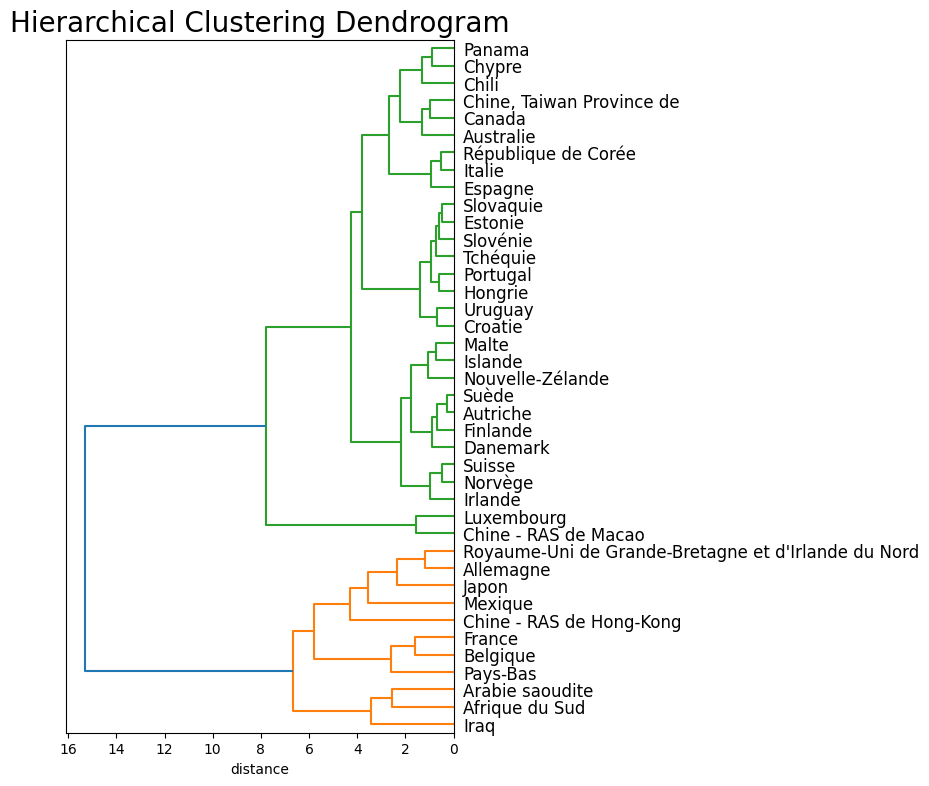

In [33]:
# Montrer un dendrogramme, juste pour le cluster 1
sample = X_scaled_clustered[X_scaled_clustered.Cluster==1]
Z = linkage(sample, 'ward') 
names = sample.index 
plot_dendrogram(Z, names, figsize=(5,9))

#**Projection des individus**

In [34]:
# Créer un modèle PCA pour réduire nos données à 4 dimensions pour la visualisation.
pca = PCA(n_components=4)
pca.fit(X_scaled)

X_reduced = pca.transform(X_scaled)

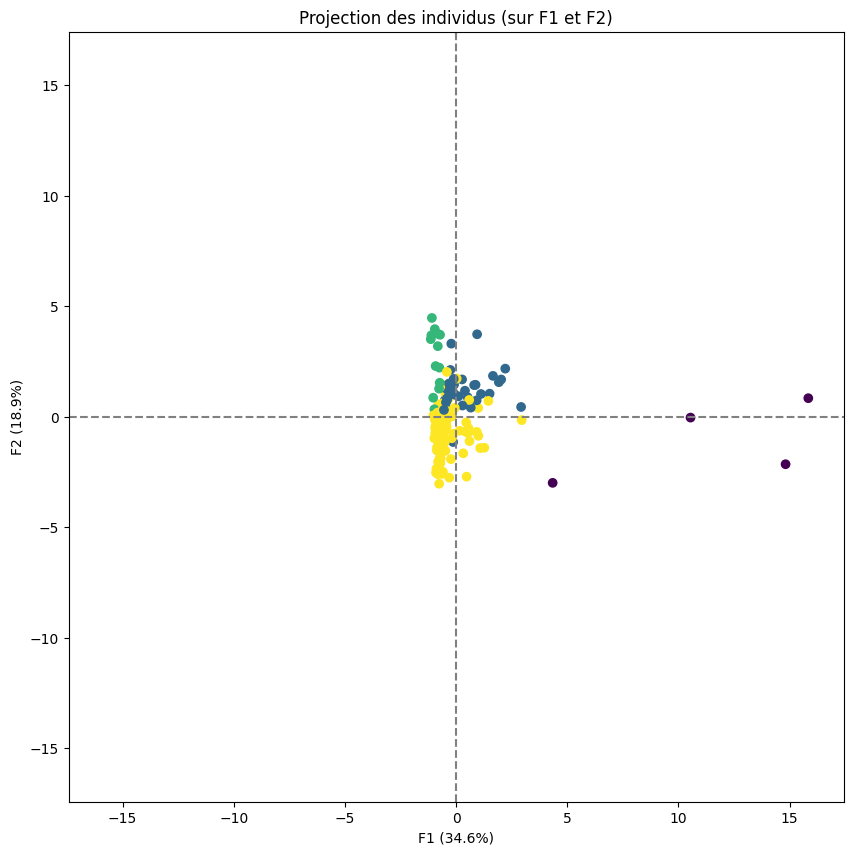

In [35]:
# Projection des individus sur F1 et F2
display_factorial_planes(X_reduced, 4, pca, [(0,1)], illustrative_var = clusters)

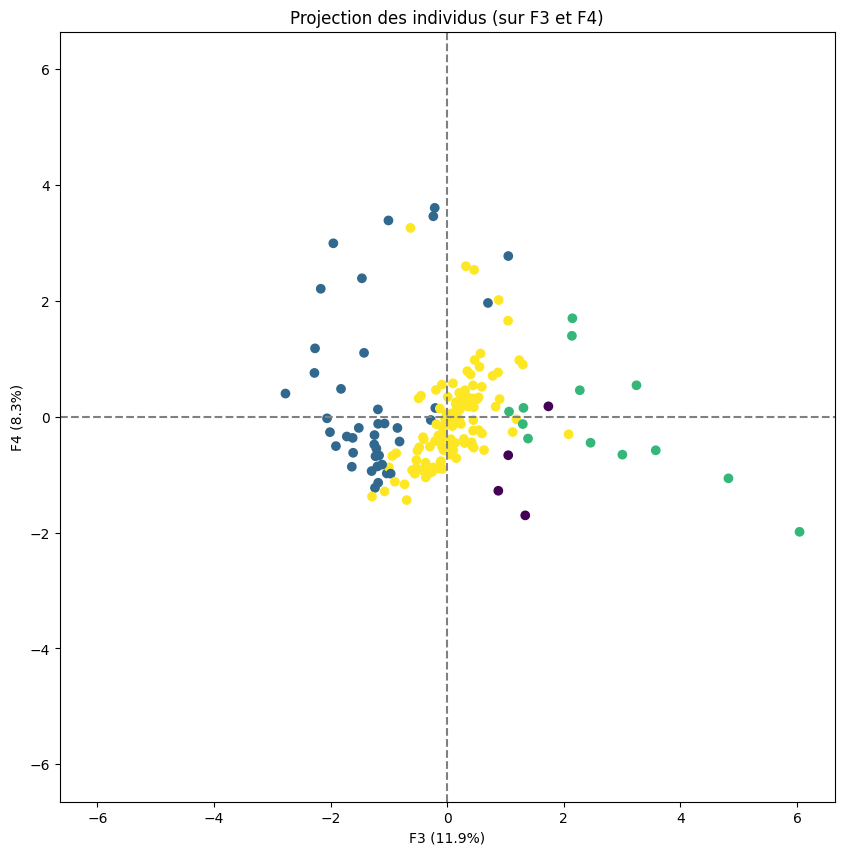

In [36]:
# Projection des individus sur F3 et F4
display_factorial_planes(X_reduced, 4, pca, [(2,3)], illustrative_var = clusters)

#**Trouver les pays du cluster 0**

In [37]:
X_clustered = X_scaled_clustered.reset_index()

In [38]:
X_clustered.head()

,Zone,Population,% Popu 2007_2017,Dispo intérieure poulet,Exportations poulet,Importations poulet,Production poulet,Consommation poulet,Taux_import_poulet %,Taux_expot_poulet %,Taux_consom_poulet %,Stabilité politique,PIB par habitant(USD),Cluster
0,Afghanistan,-0.044439,1.247909,-0.289165,-0.228052,-0.325217,-0.277627,-0.282618,-0.499988,0.145194,-1.028629,-3.056457,-0.879923,3
1,Afrique du Sud,0.090516,0.036630,0.655926,-0.087698,2.280627,0.383122,0.646850,0.874451,0.155260,1.375219,-0.240512,-0.307524,1
2,Albanie,-0.262126,-1.386999,-0.293750,-0.224724,-0.276861,-0.283674,-0.286373,0.494172,0.148263,-0.679489,0.496997,-0.360356,3
3,Algérie,-0.011256,0.380671,-0.188282,-0.224724,-0.470284,-0.178051,-0.184507,-0.671114,0.148263,-0.876131,-0.955673,-0.410486,3
4,Allemagne,0.257623,-0.937093,0.482132,1.180339,4.042929,0.321441,0.446873,-0.328862,0.161766,-0.370480,0.731659,1.594241,1


In [39]:
df_0 = X_clustered.loc[X_clustered['Cluster']== 0].reset_index(drop=True)
df_0                         

,Zone,Population,% Popu 2007_2017,Dispo intérieure poulet,Exportations poulet,Importations poulet,Production poulet,Consommation poulet,Taux_import_poulet %,Taux_expot_poulet %,Taux_consom_poulet %,Stabilité politique,PIB par habitant(USD),Cluster
0,Brésil,1.073172,-0.421050,4.262038,8.960389,-0.464912,5.436095,4.377393,-0.668397,0.181898,1.302983,-0.452825,-0.275305,0
1,"Chine, continentale",8.977395,-0.674375,8.012595,1.028088,1.947509,7.062770,7.915002,-0.614072,0.165817,-0.687515,0.072371,-0.173483,0
2,États-Unis d'Amérique,1.837091,-0.500288,8.060744,7.805453,0.179833,8.545523,8.188209,-0.633086,0.170113,1.058184,0.396428,1.926145,0
3,Inde,8.440897,-0.161537,1.363483,-0.216024,-0.481030,1.140221,1.083418,-0.673830,0.148386,-1.028629,-0.776883,-0.679882,0


Les 4 'zones' avec des populations les plus importantes

In [40]:
#Importation des données
pays_fao = pd.read_csv('fao_iso.csv')
pays_fao.head()

,Code Domaine,Domaine,Code zone (ISO3),Zone,Code Élément,Élément,Code Produit (FAO),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2010-),AFG,Afghanistan,511,Population totale,2501,Population,2017,2017,1000 personnes,36296.0,X,Ciffre de sources internationales
1,FBS,Bilans Alimentaires (2010-),ZAF,Afrique du Sud,511,Population totale,2501,Population,2017,2017,1000 personnes,57010.0,X,Ciffre de sources internationales
2,FBS,Bilans Alimentaires (2010-),ALB,Albanie,511,Population totale,2501,Population,2017,2017,1000 personnes,2884.0,X,Ciffre de sources internationales
3,FBS,Bilans Alimentaires (2010-),DZA,Algérie,511,Population totale,2501,Population,2017,2017,1000 personnes,41389.0,X,Ciffre de sources internationales
4,FBS,Bilans Alimentaires (2010-),DEU,Allemagne,511,Population totale,2501,Population,2017,2017,1000 personnes,82658.0,X,Ciffre de sources internationales


In [41]:
# Créer la dataframe 'Zone' et 'Code zone (ISO3)
df_iso = pays_fao[['Zone', 'Code zone (ISO3)']]
df_iso .head()

,Zone,Code zone (ISO3)
0,Afghanistan,AFG
1,Afrique du Sud,ZAF
2,Albanie,ALB
3,Algérie,DZA
4,Allemagne,DEU


In [42]:
zone_cluster_cah = X_clustered[['Zone', 'Cluster']]
zone_cluster_cah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Zone     170 non-null    object
 1   Cluster  170 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [43]:
#Jointure 'df_iso' et 'zone_cluster_cah'
map_cah= df_iso.merge(zone_cluster_cah, how='inner', on='Zone')
map_cah.head(10)

,Zone,Code zone (ISO3),Cluster
0,Afghanistan,AFG,3
1,Afrique du Sud,ZAF,1
2,Albanie,ALB,3
3,Algérie,DZA,3
4,Allemagne,DEU,1
5,Angola,AGO,3
6,Antigua-et-Barbuda,ATG,2
7,Arabie saoudite,SAU,1
8,Argentine,ARG,3
9,Arménie,ARM,3


In [44]:
map_cah.loc[map_cah['Zone'] == 'Chine, continentale']

,Zone,Code zone (ISO3),Cluster
33,"Chine, continentale",F41,0


In [45]:
# Remplacer le code 'F41' ('Chine Continentale') par 'CHN' pour permettre son affichage sur la carte choroplèthe
map_cah.loc[map_cah['Code zone (ISO3)']=='F41','Code zone (ISO3)']='CHN'

In [46]:
f = open ('world-countries.json', "r")
country_shapes = json.loads(f.read())

In [47]:
m = folium.Map(location=[20, 10], zoom_start=2, tiles='cartodbpositron')
m
folium.Choropleth(
    geo_data=country_shapes,
    data=map_cah,
    columns=['Code zone (ISO3)','Cluster'],
    key_on='feature.id',
    fill_color = "Set2",
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = 'Cluster CAH',
    bins=4,
    reset=True,
).add_to(m)
plt.savefig('my_plot.png')
m


<Figure size 640x480 with 0 Axes>

In [48]:
X_clustered_moy = X_scaled_clustered.groupby('Cluster').mean()

In [49]:
X_clustered_moy.head()

,Population,% Popu 2007_2017,Dispo intérieure poulet,Exportations poulet,Importations poulet,Production poulet,Consommation poulet,Taux_import_poulet %,Taux_expot_poulet %,Taux_consom_poulet %,Stabilité politique,PIB par habitant(USD)
Cluster,,,,,,,,,,,,
0,5.082139,-0.439313,5.424715,4.394477,0.295350,5.546152,5.391005,-0.647346,0.166554,0.161256,-0.190227,0.199368
1,-0.118139,-0.470633,-0.003322,0.091415,0.814101,-0.038242,0.001339,-0.220075,0.161640,0.112095,0.831670,1.273619
2,-0.276158,-0.212131,-0.303945,-0.265478,-0.355388,-0.287953,-0.298470,2.791938,-1.746645,1.904022,0.687821,-0.185105
3,-0.106309,0.206551,-0.155882,-0.157374,-0.257747,-0.149660,-0.156969,-0.220379,0.137828,-0.264435,-0.366793,-0.436600


#**Heatmap - dendrogramme**

In [50]:
X_clustered_moy = X_scaled_clustered.groupby('Cluster').mean()
X_clustered_moy.head()

,Population,% Popu 2007_2017,Dispo intérieure poulet,Exportations poulet,Importations poulet,Production poulet,Consommation poulet,Taux_import_poulet %,Taux_expot_poulet %,Taux_consom_poulet %,Stabilité politique,PIB par habitant(USD)
Cluster,,,,,,,,,,,,
0,5.082139,-0.439313,5.424715,4.394477,0.295350,5.546152,5.391005,-0.647346,0.166554,0.161256,-0.190227,0.199368
1,-0.118139,-0.470633,-0.003322,0.091415,0.814101,-0.038242,0.001339,-0.220075,0.161640,0.112095,0.831670,1.273619
2,-0.276158,-0.212131,-0.303945,-0.265478,-0.355388,-0.287953,-0.298470,2.791938,-1.746645,1.904022,0.687821,-0.185105
3,-0.106309,0.206551,-0.155882,-0.157374,-0.257747,-0.149660,-0.156969,-0.220379,0.137828,-0.264435,-0.366793,-0.436600


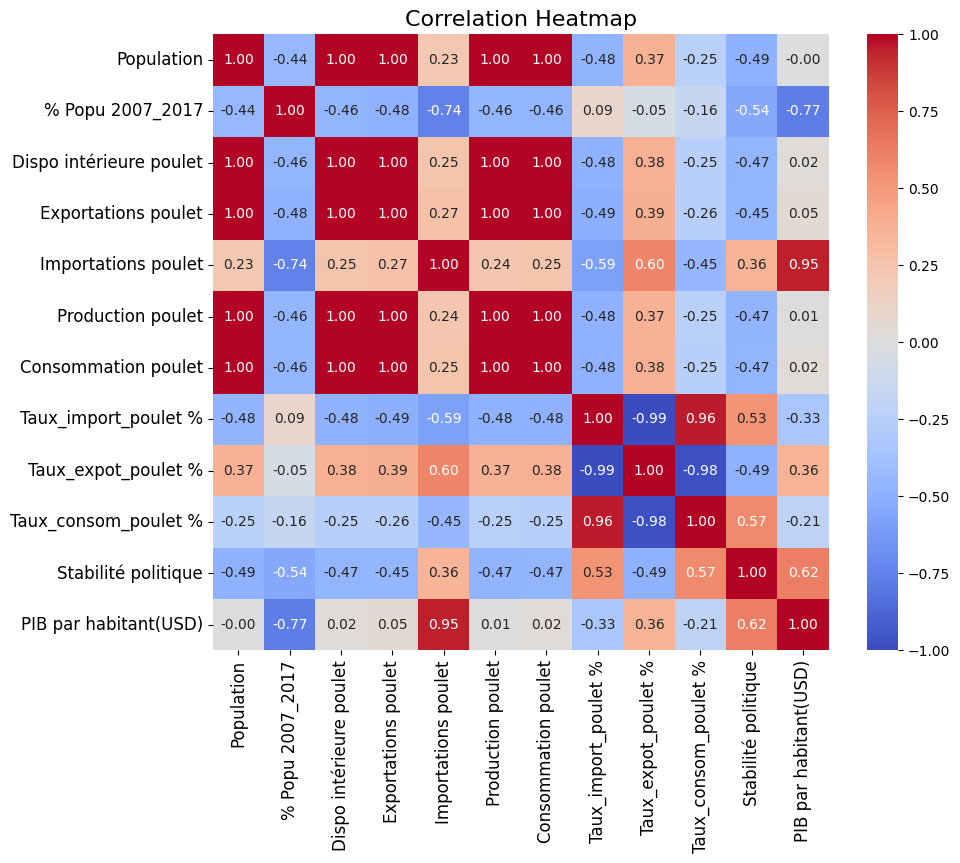

In [51]:
# Calculate the correlation matrix
corr_matrix = X_clustered_moy.corr()

# Set up the matplotlib figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Create the heatmap using seaborn
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', vmin=-1, vmax=1, square=True)

# Customize the plot
ax.set_title('Correlation Heatmap', fontsize=16)
ax.tick_params(axis='both', labelsize=12)

# Show the plot
plt.show()

<Axes: ylabel='Cluster'>

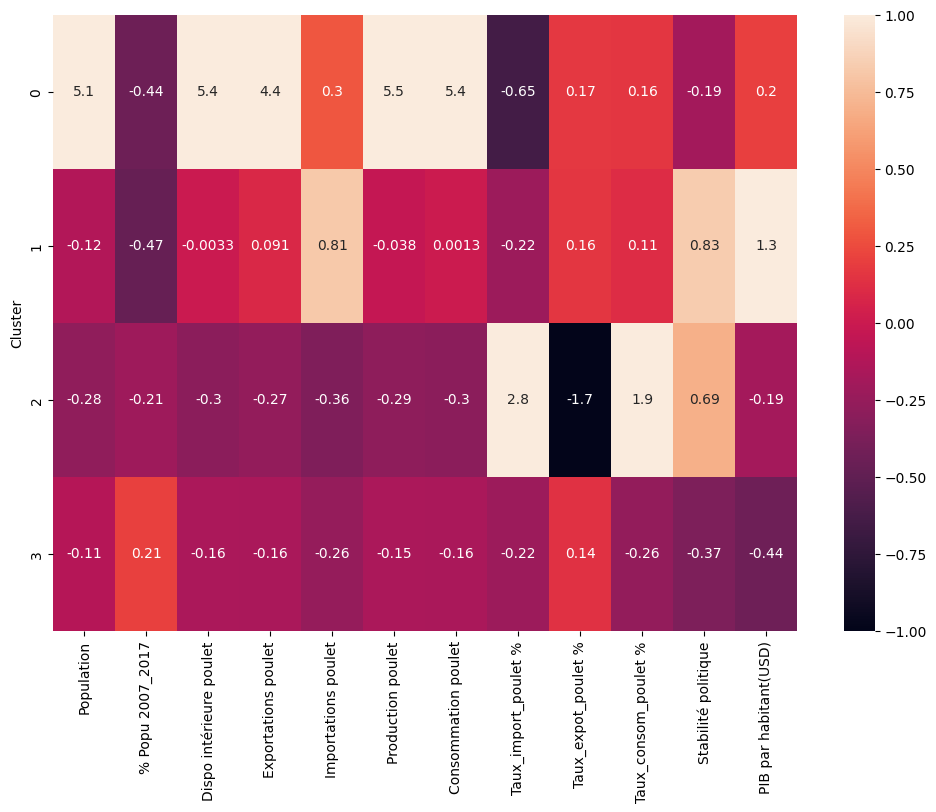

In [52]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(X_clustered_moy,annot=True, vmin=-1, vmax=1)

In [53]:
df_1 = X_clustered.loc[X_clustered['Cluster']== 1].reset_index(drop=True)
df_1.head()                       

,Zone,Population,% Popu 2007_2017,Dispo intérieure poulet,Exportations poulet,Importations poulet,Production poulet,Consommation poulet,Taux_import_poulet %,Taux_expot_poulet %,Taux_consom_poulet %,Stabilité politique,PIB par habitant(USD),Cluster
0,Afrique du Sud,0.090516,0.036630,0.655926,-0.087698,2.280627,0.383122,0.646850,0.874451,0.155260,1.375219,-0.240512,-0.307524,1
1,Allemagne,0.257623,-0.937093,0.482132,1.180339,4.042929,0.321441,0.446873,-0.328862,0.161766,-0.370480,0.731659,1.594241,1
2,Arabie saoudite,-0.065255,1.078633,0.342730,-0.202974,3.398185,-0.040580,0.365193,0.067715,0.153787,1.985210,-0.642790,1.314621,1
3,Australie,-0.120742,0.136622,0.221670,-0.133374,-0.395064,0.222672,0.241264,-0.605923,0.149245,0.909699,1.078065,1.367598,1
4,Autriche,-0.223453,-0.639523,-0.235972,-0.055073,0.109986,-0.229250,-0.233328,-0.358741,0.160539,-0.414624,1.245681,1.647664,1


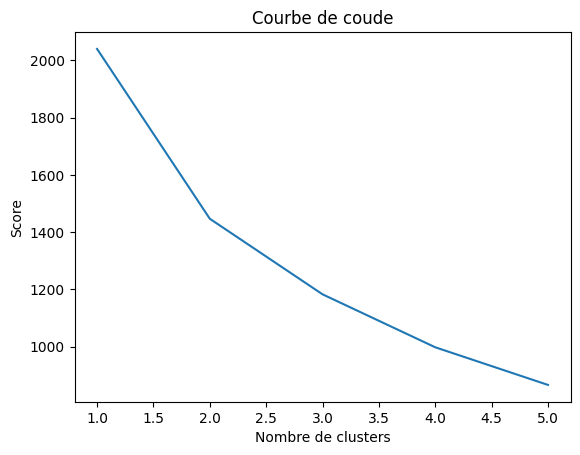

In [54]:
# num_clusters est le nombre maximal de clusters à tester
num_clusters = 6

# Calculer les scores pour chaque nombre de clusters de 1 à num_clusters
scores = []
for k in range(1, num_clusters):
    kmeans = KMeans(n_clusters=k, init='random', n_init=10)
    kmeans.fit(X_scaled)
    scores.append(-kmeans.score(X_scaled))

# Tracer la courbe de coude en utilisant les scores et le nombre de clusters
plt.plot(range(1, num_clusters), scores)
plt.xlabel('Nombre de clusters')
plt.ylabel('Score')
plt.title('Courbe de coude')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Time: 0.01148223876953125
[[-7.11835859e-02  9.55516766e-03 -1.21768723e-01 -1.06550482e-01
  -9.95467239e-03 -1.26014297e-01 -1.22638346e-01  1.14703870e-02
  -3.10076741e-03 -1.00218674e-02 -9.56454751e-05 -8.84644383e-03]
 [ 3.96255295e+00 -5.31904333e-01  6.77845893e+00  5.93131014e+00
   5.54143430e-01  7.01479585e+00  6.82686793e+00 -6.38518211e-01
   1.72609386e-01  5.57883951e-01  5.32426478e-03  4.92452040e-01]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Inertia : 1446.86
Nombre Iteration : 2.00
Time: 0.03959250450134277
[[ 1.05070893e-03  4.24369155e-01 -1.64890347e-01 -1.86172324e-01
  -2.89108855e-01 -1.63412108e-01 -1.68541661e-01 -1.68017128e-01
   1.38829563e-01 -4.82889988

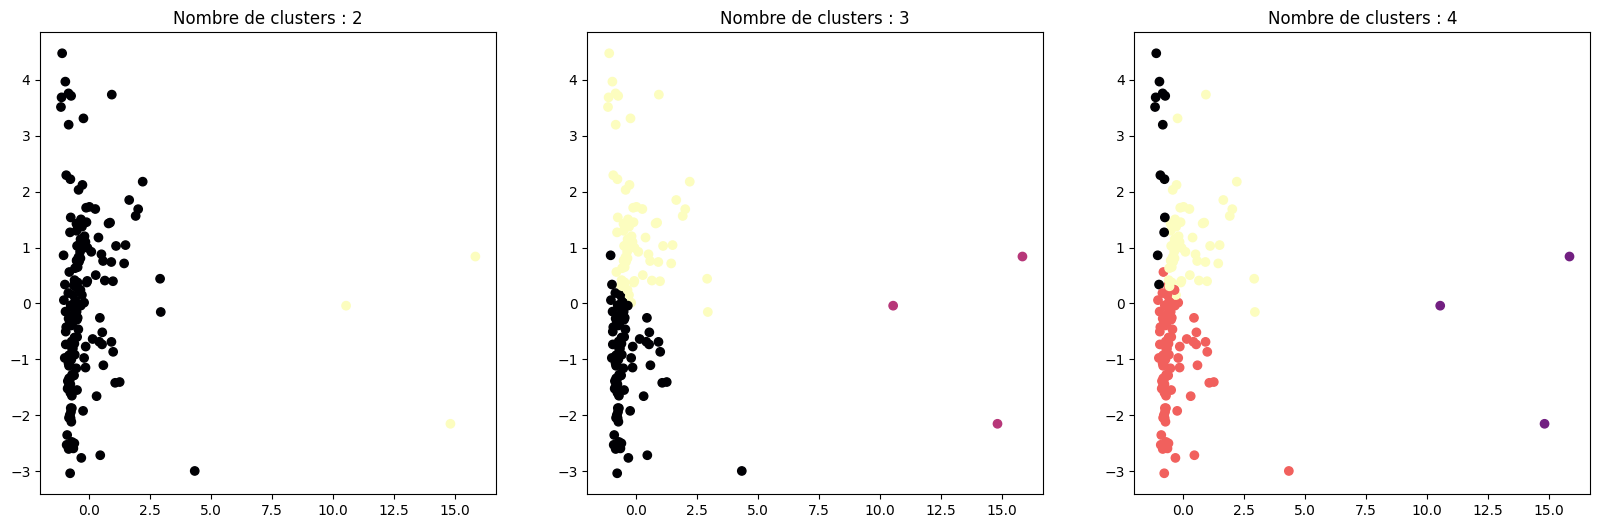

In [55]:
# Définir les nombres de clusters à tester
num_clusters = [2, 3, 4]

# Créer la figure
fig, axs = plt.subplots(1, len(num_clusters), figsize=(20, 6))

# Boucle sur chaque nombre de clusters
for i, k in enumerate(num_clusters):
    # Créer un objet KMeans avec le nombre de clusters correspondant
    km = cluster.KMeans(n_clusters=k)
    start = time.time()
    km.fit(X_scaled)
    end = time.time()
    # Tracer le diagramme de dispersion
    axs[i].scatter(X_projected[:, 0], X_projected[:, 1], c=km.labels_, cmap='magma')
    axs[i].set_title("Nombre de clusters : " + str(k))
    # Afficher les informations sur l'analyse de clustering
    print(f'Time: {end - start}')
    print(km.cluster_centers_)
    print(km.labels_)
    print("Inertia : {:.2f}".format(km.inertia_))
    print("Nombre Iteration : {:.2f}".format(km.n_iter_))


In [56]:
# Clustering par K-means
kmeans = KMeans(init='random', n_clusters=4, n_init=10)

In [57]:
kmeans.fit(X_scaled)

KMeans(init='random', n_clusters=4, n_init=10)

In [58]:
# Récupération des clusters attribués à chaque individu
clusters = kmeans.labels_

In [59]:
# Ajouter le nombre de clusters aux données originelles
X_scaled_clustered = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_clustered['cluster'] = clusters

X_scaled_clustered=X_scaled_clustered.reset_index()

In [60]:
X_scaled_clustered.head()

,Zone,Population,% Popu 2007_2017,Dispo intérieure poulet,Exportations poulet,Importations poulet,Production poulet,Consommation poulet,Taux_import_poulet %,Taux_expot_poulet %,Taux_consom_poulet %,Stabilité politique,PIB par habitant(USD),cluster
0,Afghanistan,-0.044439,1.247909,-0.289165,-0.228052,-0.325217,-0.277627,-0.282618,-0.499988,0.145194,-1.028629,-3.056457,-0.879923,0
1,Afrique du Sud,0.090516,0.036630,0.655926,-0.087698,2.280627,0.383122,0.646850,0.874451,0.155260,1.375219,-0.240512,-0.307524,1
2,Albanie,-0.262126,-1.386999,-0.293750,-0.224724,-0.276861,-0.283674,-0.286373,0.494172,0.148263,-0.679489,0.496997,-0.360356,1
3,Algérie,-0.011256,0.380671,-0.188282,-0.224724,-0.470284,-0.178051,-0.184507,-0.671114,0.148263,-0.876131,-0.955673,-0.410486,0
4,Allemagne,0.257623,-0.937093,0.482132,1.180339,4.042929,0.321441,0.446873,-0.328862,0.161766,-0.370480,0.731659,1.594241,1


In [61]:
def display_factorial_planes_1(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            fig, ax = plt.subplots(figsize=(20,10))
            
            if illustrative_var is None:
                ax.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    ax.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                ax.legend()

            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    ax.text(x, y, labels[i], fontsize='14', ha='center',va='center') 
                
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            ax.set(xlim=[-boundary,boundary], ylim=[-boundary,boundary])
        
            ax.plot([-100, 100], [0, 0], color='grey', ls='--')
            ax.plot([0, 0], [-100, 100], color='grey', ls='--')

            ax.set_xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            ax.set_ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
            ax.set_title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            
            ax.set(xlim=[-3, 18], ylim=[-5, 7])
            
            plt.show(block=False)


In [62]:
# Créer un modèle PCA pour réduire nos données à 2 dimensions pour la visualisation.
pca = PCA(n_components=2)
pca.fit(X_scaled)

PCA(n_components=2)

In [63]:
# Transférer les scaled data dans le nouvel espace ACP
X_reduced = pca.transform(X_scaled)

In [64]:
centres_reduced = pca.transform(kmeans.cluster_centers_)

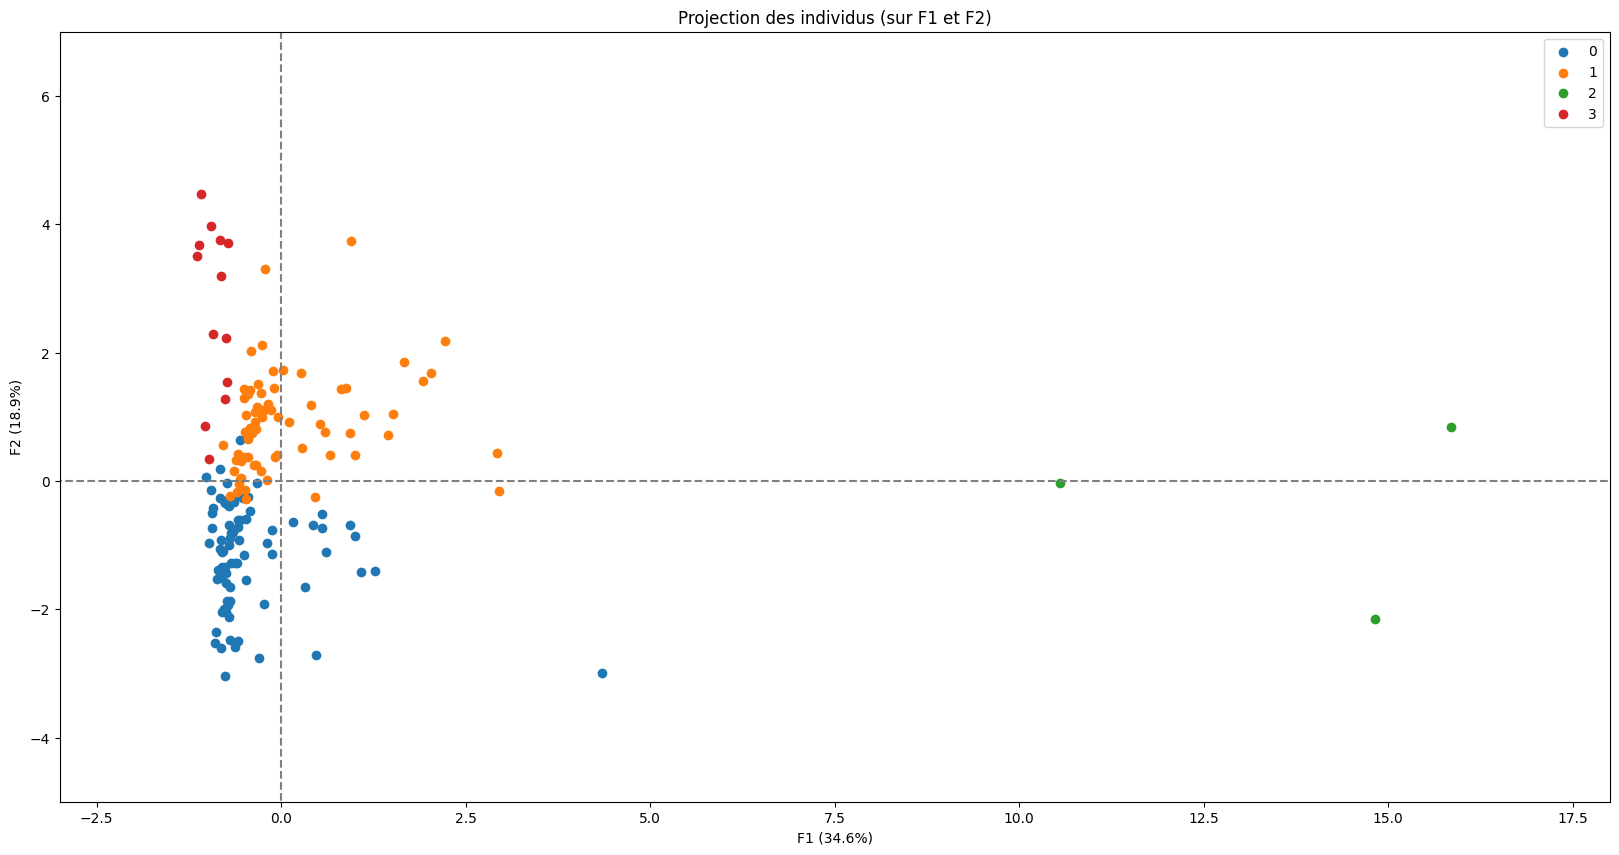

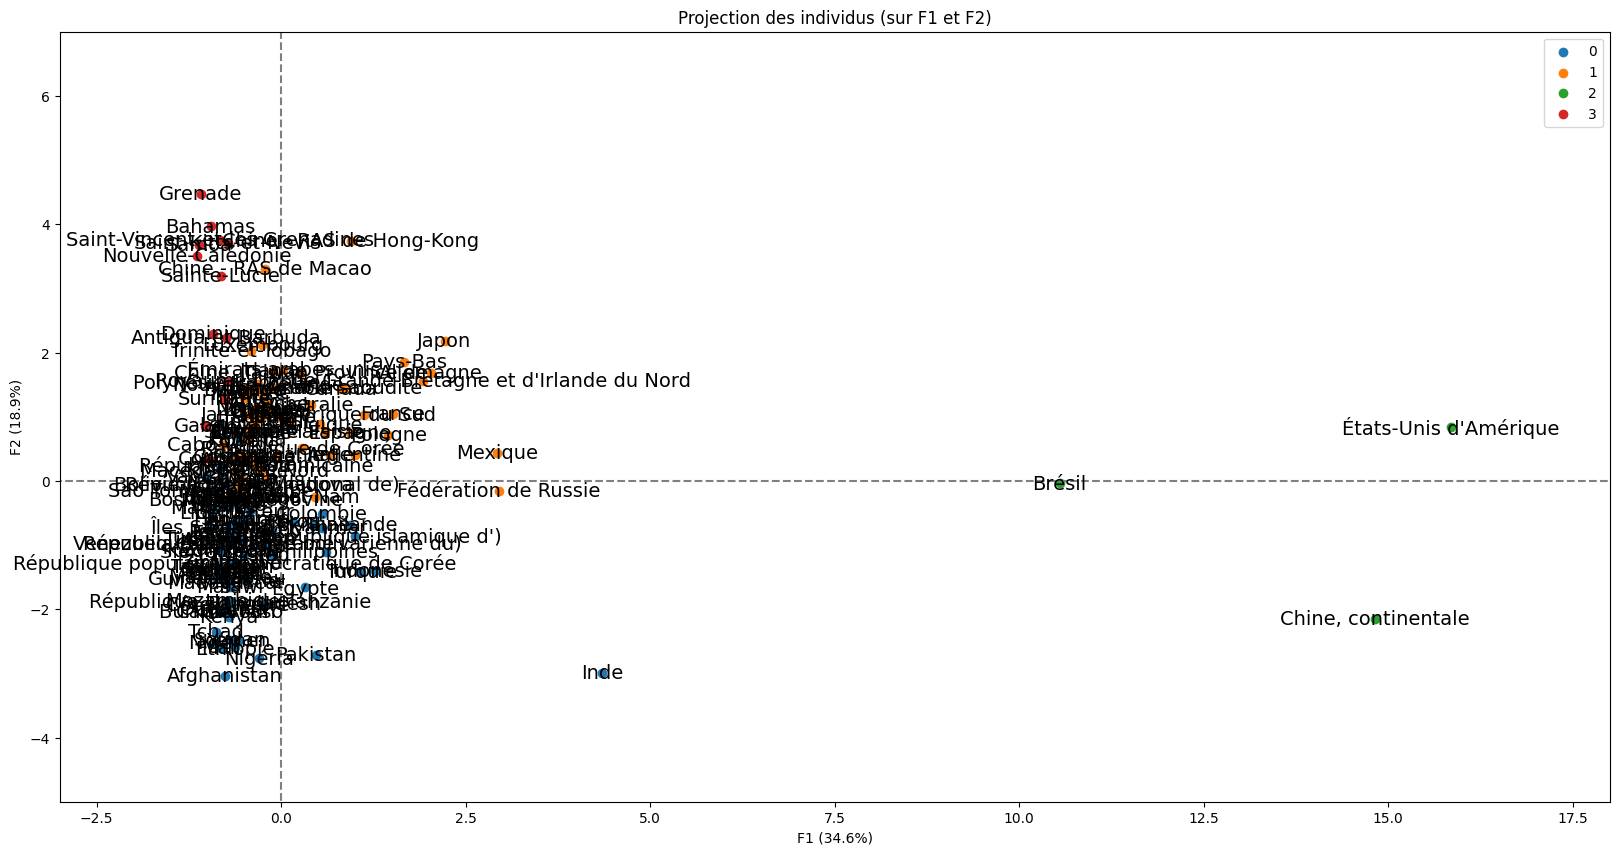

In [65]:
# Visualisation
display_factorial_planes_1(X_reduced, 2, pca, [(0,1)], illustrative_var = clusters)

# Visualisation avec noms des pays
display_factorial_planes_1(X_reduced, 2, pca, [(0,1)], illustrative_var = clusters, labels = np.array(X.index))

In [66]:
# Trouver les tailles des clusters
X_scaled_clustered["cluster"].value_counts()

0    83
1    71
3    13
2     3
Name: cluster, dtype: int64

In [67]:
import seaborn as sns

def display_parallel_coordinates_centroids(df, num_clusters):
    '''Display a parallel coordinates plot for the centroids in df'''

    # Create the plot
    fig, ax = plt.subplots(figsize=(15, 8))

    # Draw the chart
    palette = sns.color_palette("bright", num_clusters)
    parallel_coordinates(df, 'cluster', color=palette)

    # Stagger the axes
    for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(20)


In [68]:
# Créer un dataframe contenant les centroïdes
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids['cluster'] = centroids.index

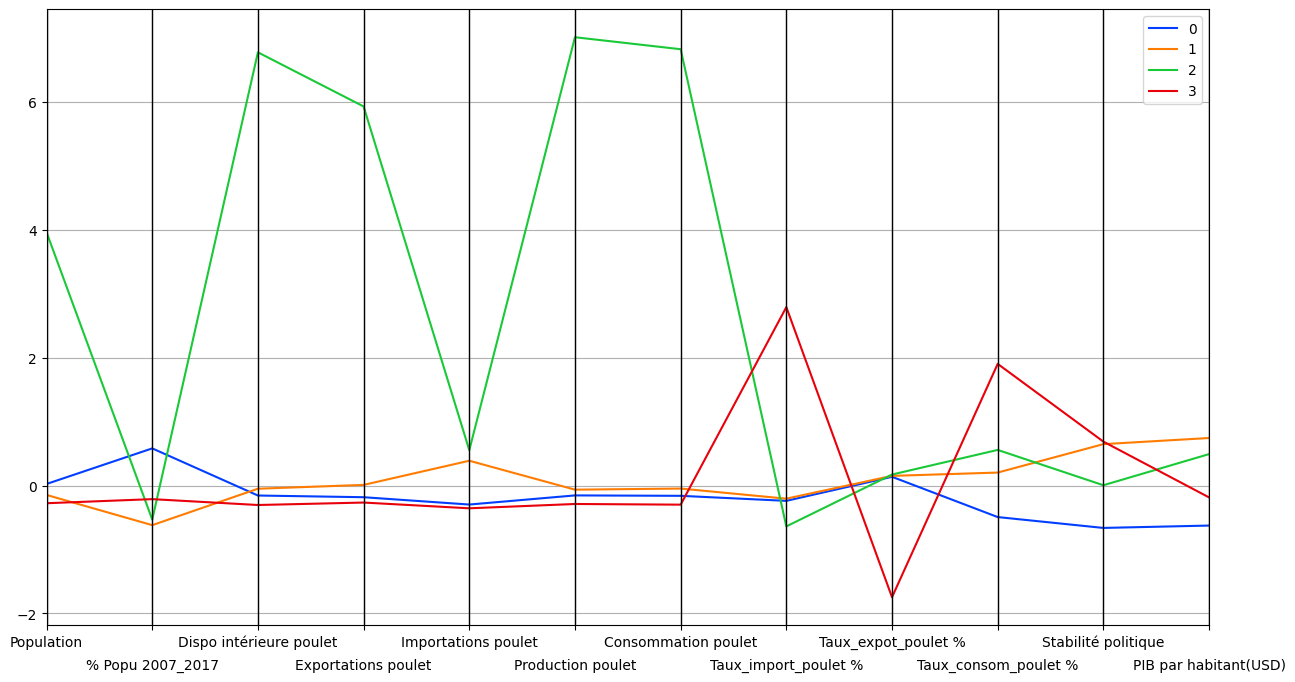

In [69]:
display_parallel_coordinates_centroids(centroids, 12)

In [70]:
# Créer la dataframe 'Zone' et 'Code zone (ISO3)
df_fao = pays_fao[['Zone', 'Code zone (ISO3)']]
df_fao .head()

,Zone,Code zone (ISO3)
0,Afghanistan,AFG
1,Afrique du Sud,ZAF
2,Albanie,ALB
3,Algérie,DZA
4,Allemagne,DEU


In [71]:
zone_cluster = X_scaled_clustered[['Zone', 'cluster']]
zone_cluster.head()

,Zone,cluster
0,Afghanistan,0
1,Afrique du Sud,1
2,Albanie,1
3,Algérie,0
4,Allemagne,1


In [72]:
map_k= df_fao.merge(zone_cluster, how='inner', on='Zone')
map_k.head()

,Zone,Code zone (ISO3),cluster
0,Afghanistan,AFG,0
1,Afrique du Sud,ZAF,1
2,Albanie,ALB,1
3,Algérie,DZA,0
4,Allemagne,DEU,1


In [73]:
map_k['Code zone (ISO3)'].unique()

array(['AFG', 'ZAF', 'ALB', 'DZA', 'DEU', 'AGO', 'ATG', 'SAU', 'ARG',
       'ARM', 'AUS', 'AUT', 'AZE', 'BHS', 'BGD', 'BRB', 'BLR', 'BEL',
       'BLZ', 'BEN', 'BOL', 'BIH', 'BWA', 'BRA', 'BGR', 'BFA', 'CPV',
       'KHM', 'CMR', 'CAN', 'CHL', 'HKG', 'MAC', 'F41', 'TWN', 'CYP',
       'COL', 'COG', 'CRI', 'CIV', 'HRV', 'CUB', 'DNK', 'DJI', 'DMA',
       'EGY', 'SLV', 'ARE', 'ECU', 'ESP', 'EST', 'SWZ', 'USA', 'ETH',
       'RUS', 'FJI', 'FIN', 'FRA', 'GAB', 'GMB', 'GEO', 'GHA', 'GRC',
       'GRD', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HUN', 'SLB',
       'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISL', 'ISR', 'ITA', 'JAM',
       'JPN', 'JOR', 'KAZ', 'KEN', 'KGZ', 'KIR', 'KWT', 'LSO', 'LVA',
       'LBN', 'LBR', 'LTU', 'LUX', 'MKD', 'MDG', 'MYS', 'MWI', 'MDV',
       'MLI', 'MLT', 'MAR', 'MUS', 'MRT', 'MEX', 'MNG', 'MNE', 'MOZ',
       'MMR', 'NAM', 'NPL', 'NIC', 'NER', 'NGA', 'NOR', 'NCL', 'NZL',
       'OMN', 'UGA', 'PAK', 'PAN', 'PRY', 'NLD', 'PER', 'PHL', 'POL',
       'PYF', 'PRT',

In [74]:
# Trouver le pays avec le Code zone = F41
map_k.loc[map_k['Code zone (ISO3)']=='F41']

,Zone,Code zone (ISO3),cluster
33,"Chine, continentale",F41,2


In [75]:
# Remplacer le code 'F41' ('Chine Continentale') par 'CHN' pour permettre son affichage sur la carte choroplèthe
map_k.loc[map_k['Code zone (ISO3)']=='F41','Code zone (ISO3)']='CHN'

In [76]:
m = folium.Map(location=[20, 10], zoom_start=2, tiles='cartodbpositron')
m
folium.Choropleth(
    geo_data=country_shapes,
    data=map_k,
    columns=['Code zone (ISO3)','cluster'],
    key_on='feature.id',
    fill_color = "Set2",
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = 'Cluster K-Means',
    bins=5,
    reset=True,
).add_to(m)
plt.savefig('my_plot.png')
m

<Figure size 640x480 with 0 Axes>

In [77]:
X_clustered_moy = X_scaled_clustered.groupby('cluster').mean()
X_clustered_moy

<ipython-input-77-772debe2377d>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Population,% Popu 2007_2017,Dispo intérieure poulet,Exportations poulet,Importations poulet,Production poulet,Consommation poulet,Taux_import_poulet %,Taux_expot_poulet %,Taux_consom_poulet %,Stabilité politique,PIB par habitant(USD)
cluster,,,,,,,,,,,,
0,0.025316,0.581904,-0.155426,-0.181999,-0.296669,-0.153814,-0.160227,-0.238897,0.137384,-0.492565,-0.662581,-0.625491
1,-0.146462,-0.618938,-0.049067,0.010749,0.388467,-0.063865,-0.046502,-0.204946,0.151911,0.203619,0.648402,0.744292
2,3.962553,-0.531904,6.778459,5.931310,0.554143,7.014796,6.826868,-0.638518,0.172609,0.557884,0.005324,0.492452
3,-0.276158,-0.212131,-0.303945,-0.265478,-0.355388,-0.287953,-0.298470,2.791938,-1.746645,1.904022,0.687821,-0.185105


<Axes: ylabel='cluster'>

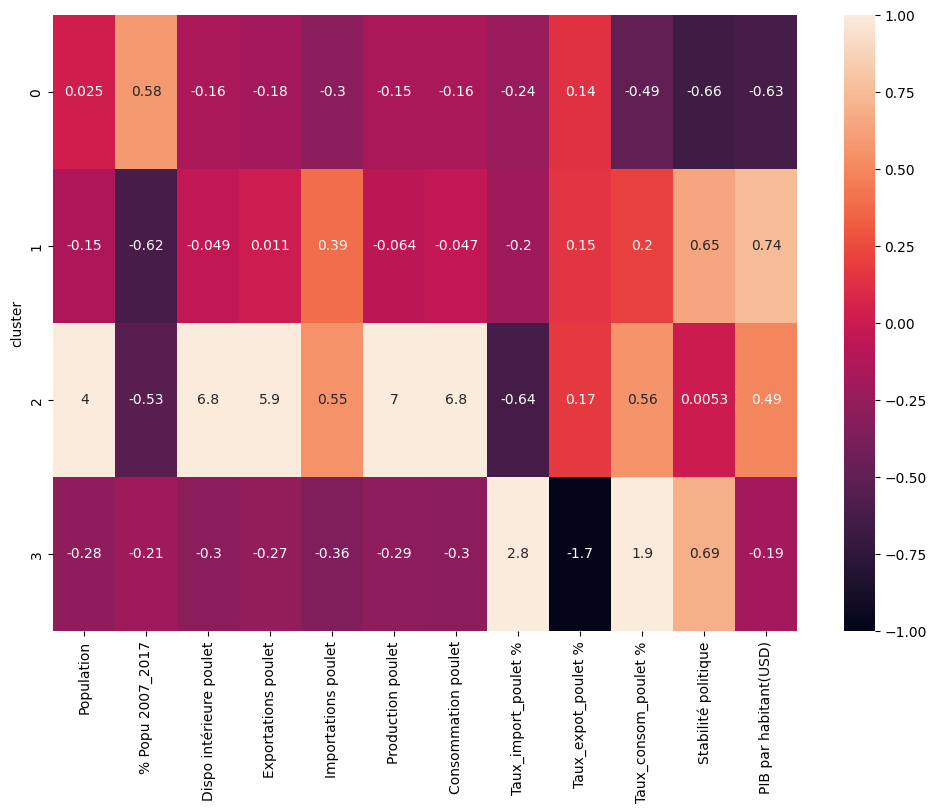

In [78]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(X_clustered_moy,annot=True, vmin=-1, vmax=1)

In [79]:
X_scaled_clustered.head()

,Zone,Population,% Popu 2007_2017,Dispo intérieure poulet,Exportations poulet,Importations poulet,Production poulet,Consommation poulet,Taux_import_poulet %,Taux_expot_poulet %,Taux_consom_poulet %,Stabilité politique,PIB par habitant(USD),cluster
0,Afghanistan,-0.044439,1.247909,-0.289165,-0.228052,-0.325217,-0.277627,-0.282618,-0.499988,0.145194,-1.028629,-3.056457,-0.879923,0
1,Afrique du Sud,0.090516,0.036630,0.655926,-0.087698,2.280627,0.383122,0.646850,0.874451,0.155260,1.375219,-0.240512,-0.307524,1
2,Albanie,-0.262126,-1.386999,-0.293750,-0.224724,-0.276861,-0.283674,-0.286373,0.494172,0.148263,-0.679489,0.496997,-0.360356,1
3,Algérie,-0.011256,0.380671,-0.188282,-0.224724,-0.470284,-0.178051,-0.184507,-0.671114,0.148263,-0.876131,-0.955673,-0.410486,0
4,Allemagne,0.257623,-0.937093,0.482132,1.180339,4.042929,0.321441,0.446873,-0.328862,0.161766,-0.370480,0.731659,1.594241,1


In [81]:
pays_recommandes = X_scaled_clustered[X_scaled_clustered.cluster==1].reset_index(drop=True)
pays_recommandes

,Zone,Population,% Popu 2007_2017,Dispo intérieure poulet,Exportations poulet,Importations poulet,Production poulet,Consommation poulet,Taux_import_poulet %,Taux_expot_poulet %,Taux_consom_poulet %,Stabilité politique,PIB par habitant(USD),cluster
0,Afrique du Sud,0.090516,0.036630,0.655926,-0.087698,2.280627,0.383122,0.646850,0.874451,0.155260,1.375219,-0.240512,-0.307524,1
1,Albanie,-0.262126,-1.386999,-0.293750,-0.224724,-0.276861,-0.283674,-0.286373,0.494172,0.148263,-0.679489,0.496997,-0.360356,1
2,Allemagne,0.257623,-0.937093,0.482132,1.180339,4.042929,0.321441,0.446873,-0.328862,0.161766,-0.370480,0.731659,1.594241,1
3,Arabie saoudite,-0.065255,1.078633,0.342730,-0.202974,3.398185,-0.040580,0.365193,0.067715,0.153787,1.985210,-0.642790,1.314621,1
4,Argentine,0.005344,-0.325772,0.584391,0.225505,-0.438047,0.582274,0.562822,-0.608639,0.152314,0.985948,0.262335,0.164716,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Suisse,-0.225826,-0.225842,-0.254314,-0.216024,-0.207014,-0.252229,-0.246002,-0.396769,0.150718,-0.518965,1.480343,2.371807,1
67,Tchéquie,-0.211588,-0.866695,-0.201121,-0.165999,0.142223,-0.223203,-0.198590,-0.182183,0.151946,-0.181864,1.189809,0.903273,1
68,Trinité-et-Tobago,-0.271900,-0.660528,-0.280452,-0.224724,-0.357454,-0.264323,-0.273229,0.179083,0.148263,3.076774,0.385253,0.343237,1
69,Uruguay,-0.258527,-0.838823,-0.300170,-0.218199,-0.464912,-0.275611,-0.293884,-0.589625,0.148754,-0.723633,1.245681,0.136236,1
